In [1]:
!wget "ftp://ftp.inrialpes.fr/pub/lear/douze/data/jpg1.tar.gz"

--2020-12-17 17:43:39--  ftp://ftp.inrialpes.fr/pub/lear/douze/data/jpg1.tar.gz
           => ‘jpg1.tar.gz’
Resolving ftp.inrialpes.fr (ftp.inrialpes.fr)... 194.199.18.221
Connecting to ftp.inrialpes.fr (ftp.inrialpes.fr)|194.199.18.221|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/lear/douze/data ... done.
==> SIZE jpg1.tar.gz ... 1141827194
==> PASV ... done.    ==> RETR jpg1.tar.gz ... done.
Length: 1141827194 (1.1G) (unauthoritative)

jpg1.tar.gz         100%[===================>]   1.06G  16.3MB/s    in 60s     

2020-12-17 17:44:40 (18.3 MB/s) - ‘jpg1.tar.gz’ saved [1141827194]



In [2]:
!wget "ftp://ftp.inrialpes.fr/pub/lear/douze/data/jpg2.tar.gz"

--2020-12-17 17:44:40--  ftp://ftp.inrialpes.fr/pub/lear/douze/data/jpg2.tar.gz
           => ‘jpg2.tar.gz’
Resolving ftp.inrialpes.fr (ftp.inrialpes.fr)... 194.199.18.221
Connecting to ftp.inrialpes.fr (ftp.inrialpes.fr)|194.199.18.221|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/lear/douze/data ... done.
==> SIZE jpg2.tar.gz ... 1701364177
==> PASV ... done.    ==> RETR jpg2.tar.gz ... done.
Length: 1701364177 (1.6G) (unauthoritative)

jpg2.tar.gz         100%[===================>]   1.58G  19.2MB/s    in 1m 46s  

2020-12-17 17:46:28 (15.3 MB/s) - ‘jpg2.tar.gz’ saved [1701364177]



In [3]:
!tar -xf /content/jpg1.tar.gz

In [4]:
!tar -xf /content/jpg2.tar.gz

In [2]:
import numpy as np
import torch 
from PIL import Image
from torchvision import transforms
import os
from tqdm.notebook import tqdm 

# HOG Features Extraction

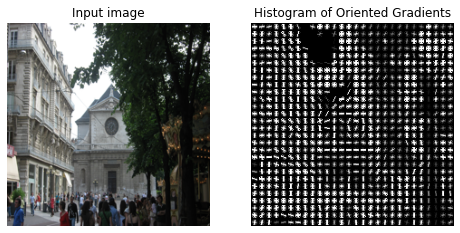

In [6]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, exposure


image = Image.open('/content/jpg/132300.jpg')#data.astronaut()
image = image.resize((224,224))

fd, hog_image = hog(image, orientations=16, pixels_per_cell=(8, 8),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [7]:
!mkdir '/content/jpg_hog'

In [8]:
r_path = '/content/jpg/'
w_path = '/content/jpg_hog/'

for file in tqdm(os.listdir(r_path)):
    image_path = r_path + file
    image = Image.open(image_path)
    image = image.resize((224,224))

    hog_vect = hog(image, orientations=16, pixels_per_cell=(8, 8),
                    cells_per_block=(1, 1), feature_vector=True, multichannel=True)
    
    vect_name = w_path + 'hog_' + file[:-4] 
    #print(type(hog_vect))
    #print(hog_vect.shape)
    np.save(vect_name, hog_vect)

# CNN Featrues Extraction

In [10]:
!mkdir '/content/jpg_cnn'

In [13]:
model = torch.hub.load('pytorch/vision:v0.6.0', 'resnet18', pretrained=True)
model = torch.nn.Sequential(*(list(model.children())[:-1]))

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.6.0


In [14]:
print(model)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

In [17]:
image = Image.open('/content/jpg/132300.jpg')
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
image = image.resize((224,224))
input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0)

with torch.no_grad():
    output = model(input_batch)

In [23]:
output.numpy().ravel().shape

(512,)

In [1]:
# sample execution (requires torchvision)

preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
 # create a mini-batch as expected by the model

r_path = '/content/jpg/'
w_path = '/content/jpg_cnn/'

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    for file in tqdm(os.listdir(r_path)):
        image_path = r_path + file
        image = Image.open(image_path)
        image = image.resize((224,224))
        input_tensor = preprocess(image)
        input_batch = input_tensor.unsqueeze(0)

        output = model(input_batch)
        output = output.numpy().ravel()
        vect_name = w_path + 'cnn_' + file[:-4] 
        #print(type(hog_vect))
        #print(hog_vect.shape)
        np.save(vect_name, output)
    


NameError: ignored